In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font size="5" color="red">ch08_손글씨데이터</font></b>

In [22]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv',delimiter=',',skiprows=1)
data.shape

(100, 785)

# 데이터셋을 라으브러리에서 가져올예정, 파일에서도 가져옴

In [31]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [4]:
print('타켓:',data[0,0])

타켓: 5.0


In [5]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

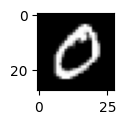

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [9]:
# %pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/46.2 MB 11.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/46.2 MB 11.4 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/46.2 MB 11.5 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/46.2 MB 11.5 MB/s eta 0:00:04
   ---------- ----------------------------- 12.1/46.2 MB 11.6 MB/s eta 0:00:03
   ------------ --------------------------- 14.4/46.2 MB 11.6 MB/s eta 0:00:03
   -------------- ------------------------- 17.0/46.2 MB 11.7 MB/s eta 0:00:03
   ---------------- ----------------------- 19.4/46.2 MB 11.7 MB/s eta 0:00:03
   ------------------ --------------------- 21.8/46.2 MB 11.7 MB/s eta 0:00:03
   -------------------- ------------------- 24.1/46.2 MB 11.7 MB/s eta 0:00:02
   ----------------------- ---------------- 26.7/46.2 MB 11.7 MB/s eta 0:00:02
   ------------------------- -------------- 29.1/46.2 MB 11.7 MB/

In [10]:
# %pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/39.5 MB 9.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.5 MB 10.5 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/39.5 MB 7.5 MB/s eta 0:00:05
   ------ --------------------------------- 6.8/39.5 MB 8.2 MB/s eta 0:00:04
   --------- ------------------------------ 9.2/39.5 MB 8.9 MB/s eta 0:00:04
   ----------- ---------------------------- 11.8/39.5 MB 9.5 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/39.5 MB 9.8 MB/s eta 0:00:03
   ---------------- ----------------------- 16.5/39.5 MB 10.0 MB/s eta 0:00:03
   ------------------- -------------------- 18.9/39.5 MB 10.2 MB/s eta 0:00:03
   --------------------- ------------------ 21.5/39.5 MB 10.4 MB/s eta 0:00:02
   ------------------------ --------------- 23.9/39.5 MB 10.5 MB/s eta 0:00:02
   -------------------------- ------------- 26.2/39.5 MB 10.6 MB/s eta 0

In [6]:
#칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('data/junseo.jpg',cv2.IMREAD_GRAYSCALE)
print(image_gray.shape)

(1350, 1080)


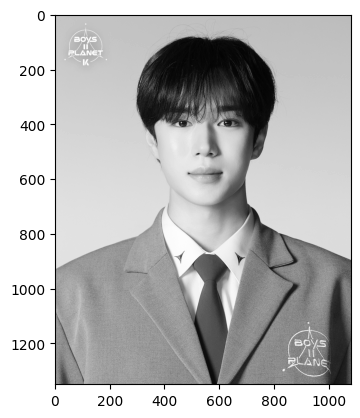

In [12]:
plt.imshow(image_gray,cmap='gray')

# 1. 데이터생성 및 전처리

In [7]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape , y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel),end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [9]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)fh qnsfl
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [20]:
#학습셋(5만개:fit용),검증셋(만:fit용),테스트셋(만:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [10]:
# 입력(독립)변수 (n, 28,28) -> (n, 784) -> 실수형변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [11]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약)
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
test_X = X_test.reshape(10000,-1)
train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [12]:
#타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[0 2]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
#데이터 처리전작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
#타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train,10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)

train_X.shape, y_train.shape, val_X.shape, y_val.shape ,test_X.shape, test_Y.shape

((700, 784), (700,), (300, 784), (300,), (10000, 784), (10000, 10))

# 2. 모델 구성

In [14]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 학습과정 설정

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [16]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 1s 31ms/step - loss: 2.2813 - accuracy: 0.1300 - val_loss: 2.2442 - val_accuracy: 0.1267
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2544 - accuracy: 0.1429 - val_loss: 2.2173 - val_accuracy: 0.1367
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2295 - accuracy: 0.1443 - val_loss: 2.1918 - val_accuracy: 0.1367
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2064 - accuracy: 0.1557 - val_loss: 2.1701 - val_accuracy: 0.1433
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1870 - accuracy: 0.1600 - val_loss: 2.1511 - val_accuracy: 0.1600
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1672 - accuracy: 0.1686 - val_loss: 2.1295 - val_accuracy: 0.1867
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1409 - accuracy: 0.1986 - val_loss: 2.1036 - val_accuracy: 0.2333
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 1.6414 - accuracy: 0.4143 - val_loss: 1.6895 - val_accuracy: 0.3700
Epoch 60/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6346 - accuracy: 0.4143 - val_loss: 1.6847 - val_accuracy: 0.3667
Epoch 61/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6288 - accuracy: 0.4186 - val_loss: 1.6787 - val_accuracy: 0.3700
Epoch 62/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6228 - accuracy: 0.4257 - val_loss: 1.6755 - val_accuracy: 0.3667
Epoch 63/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6166 - accuracy: 0.4257 - val_loss: 1.6703 - val_accuracy: 0.3733
Epoch 64/500
7/7 [==============================] - 0s 6ms/step - loss: 1.6109 - accuracy: 0.4257 - val_loss: 1.6658 - val_accuracy: 0.3700
Epoch 65/500
7/7 [==============================] - 0s 7ms/step - loss: 1.6051 - accuracy: 0.4214 - val_loss: 1.6609 - val_accuracy: 0.3733
Epoch 66/500
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 1.3562 - accuracy: 0.5143 - val_loss: 1.4849 - val_accuracy: 0.4200
Epoch 118/500
7/7 [==============================] - 0s 6ms/step - loss: 1.3521 - accuracy: 0.5171 - val_loss: 1.4819 - val_accuracy: 0.4200
Epoch 119/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3478 - accuracy: 0.5157 - val_loss: 1.4786 - val_accuracy: 0.4200
Epoch 120/500
7/7 [==============================] - 0s 6ms/step - loss: 1.3432 - accuracy: 0.5214 - val_loss: 1.4746 - val_accuracy: 0.4233
Epoch 121/500
7/7 [==============================] - 0s 6ms/step - loss: 1.3392 - accuracy: 0.5186 - val_loss: 1.4730 - val_accuracy: 0.4200
Epoch 122/500
7/7 [==============================] - 0s 6ms/step - loss: 1.3352 - accuracy: 0.5214 - val_loss: 1.4685 - val_accuracy: 0.4233
Epoch 123/500
7/7 [==============================] - 0s 6ms/step - loss: 1.3305 - accuracy: 0.5186 - val_loss: 1.4666 - val_accuracy: 0.4267
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 1.1508 - accuracy: 0.5629 - val_loss: 1.3727 - val_accuracy: 0.4433
Epoch 176/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1481 - accuracy: 0.5614 - val_loss: 1.3688 - val_accuracy: 0.4467
Epoch 177/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1457 - accuracy: 0.5657 - val_loss: 1.3714 - val_accuracy: 0.4467
Epoch 178/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1429 - accuracy: 0.5657 - val_loss: 1.3692 - val_accuracy: 0.4467
Epoch 179/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1404 - accuracy: 0.5614 - val_loss: 1.3695 - val_accuracy: 0.4433
Epoch 180/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1377 - accuracy: 0.5700 - val_loss: 1.3669 - val_accuracy: 0.4433
Epoch 181/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1350 - accuracy: 0.5671 - val_loss: 1.3659 - val_accuracy: 0.4433
Epoch 182/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.0163 - accuracy: 0.6114 - val_loss: 1.3553 - val_accuracy: 0.4633
Epoch 234/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0136 - accuracy: 0.6186 - val_loss: 1.3560 - val_accuracy: 0.4567
Epoch 235/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0108 - accuracy: 0.6229 - val_loss: 1.3559 - val_accuracy: 0.4533
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0083 - accuracy: 0.6214 - val_loss: 1.3534 - val_accuracy: 0.4600
Epoch 237/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0056 - accuracy: 0.6214 - val_loss: 1.3528 - val_accuracy: 0.4667
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0029 - accuracy: 0.6271 - val_loss: 1.3535 - val_accuracy: 0.4633
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0009 - accuracy: 0.6271 - val_loss: 1.3559 - val_accuracy: 0.4700
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.8999 - accuracy: 0.7143 - val_loss: 1.3551 - val_accuracy: 0.5433
Epoch 292/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8983 - accuracy: 0.7114 - val_loss: 1.3573 - val_accuracy: 0.5433
Epoch 293/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8972 - accuracy: 0.7114 - val_loss: 1.3546 - val_accuracy: 0.5400
Epoch 294/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8959 - accuracy: 0.7114 - val_loss: 1.3576 - val_accuracy: 0.5433
Epoch 295/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8948 - accuracy: 0.7086 - val_loss: 1.3599 - val_accuracy: 0.5467
Epoch 296/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8928 - accuracy: 0.7071 - val_loss: 1.3567 - val_accuracy: 0.5333
Epoch 297/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8913 - accuracy: 0.7057 - val_loss: 1.3578 - val_accuracy: 0.5433
Epoch 298/500
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 0.8208 - accuracy: 0.7457 - val_loss: 1.4020 - val_accuracy: 0.5500
Epoch 350/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8190 - accuracy: 0.7500 - val_loss: 1.4035 - val_accuracy: 0.5500
Epoch 351/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8176 - accuracy: 0.7486 - val_loss: 1.4003 - val_accuracy: 0.5467
Epoch 352/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8152 - accuracy: 0.7429 - val_loss: 1.4028 - val_accuracy: 0.5533
Epoch 353/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8142 - accuracy: 0.7457 - val_loss: 1.4039 - val_accuracy: 0.5567
Epoch 354/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8123 - accuracy: 0.7514 - val_loss: 1.4061 - val_accuracy: 0.5633
Epoch 355/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8110 - accuracy: 0.7529 - val_loss: 1.4064 - val_accuracy: 0.5600
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.7511 - accuracy: 0.7700 - val_loss: 1.4401 - val_accuracy: 0.5567
Epoch 408/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7500 - accuracy: 0.7671 - val_loss: 1.4373 - val_accuracy: 0.5633
Epoch 409/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7492 - accuracy: 0.7700 - val_loss: 1.4380 - val_accuracy: 0.5567
Epoch 410/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7481 - accuracy: 0.7700 - val_loss: 1.4433 - val_accuracy: 0.5567
Epoch 411/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7470 - accuracy: 0.7643 - val_loss: 1.4415 - val_accuracy: 0.5600
Epoch 412/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7457 - accuracy: 0.7671 - val_loss: 1.4447 - val_accuracy: 0.5600
Epoch 413/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7454 - accuracy: 0.7700 - val_loss: 1.4421 - val_accuracy: 0.5533
Epoch 414/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.6994 - accuracy: 0.7857 - val_loss: 1.4986 - val_accuracy: 0.5500
Epoch 466/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.7800 - val_loss: 1.4988 - val_accuracy: 0.5533
Epoch 467/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6977 - accuracy: 0.7829 - val_loss: 1.4981 - val_accuracy: 0.5500
Epoch 468/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6972 - accuracy: 0.7786 - val_loss: 1.4988 - val_accuracy: 0.5467
Epoch 469/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6963 - accuracy: 0.7857 - val_loss: 1.4971 - val_accuracy: 0.5600
Epoch 470/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.7886 - val_loss: 1.5037 - val_accuracy: 0.5500
Epoch 471/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.7871 - val_loss: 1.5023 - val_accuracy: 0.5500
Epoch 472/500
7/7 [========

In [17]:
#학습과정 살펴보기 
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

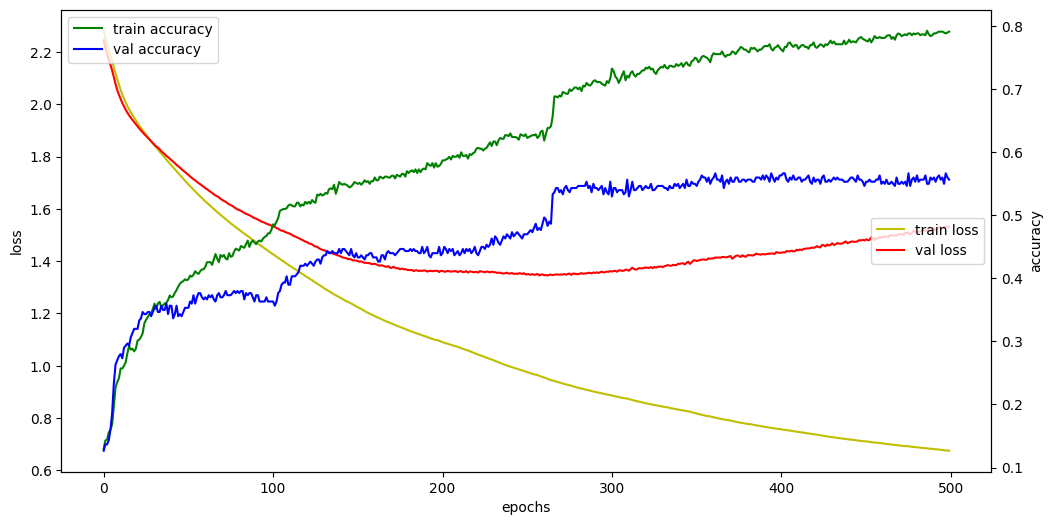

In [18]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [19]:
#모델 평가하기
loss_and_metrics = model.evaluate(test_X,test_Y,batch_size=100, verbose=0)
print('loss:',loss_and_metrics[0])
print('accuracy:',loss_and_metrics[1])

loss: 1.5977221727371216
accuracy: 0.5683000087738037


# 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units 수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수)
- epoch 조정
- optimizer 변경

In [20]:
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.5977221727371216
accuracy : 0.5683000087738037


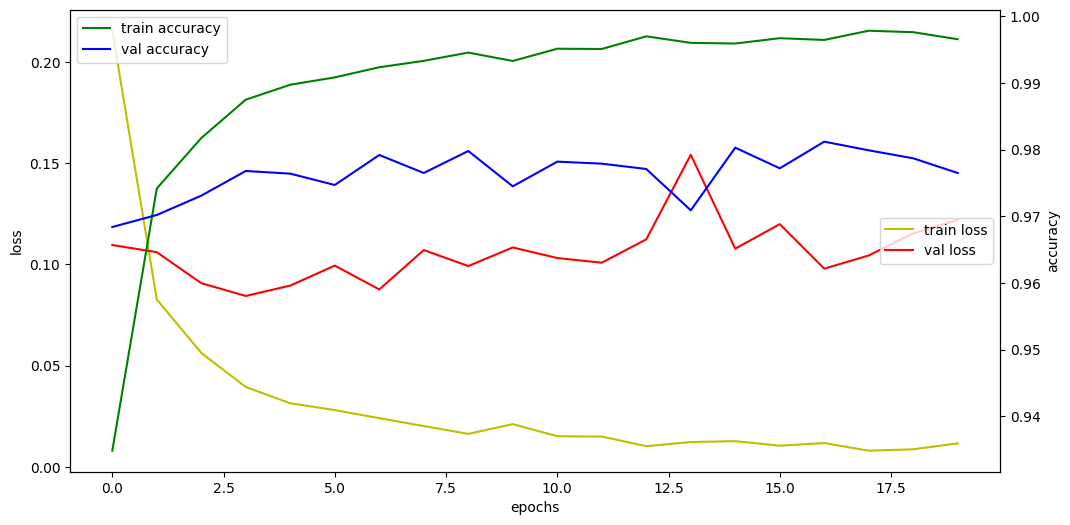

CPU times: total: 9min 48s
Wall time: 1min 58s


In [33]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 7000)
# val_idx  = np.random.choice(10000, 3000)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=20,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [21]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [23]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 0s 1ms/step


array([8, 2, 6, ..., 4, 5, 6], dtype=int64)

In [24]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,607,1,128,194,0,30,4,0,16,0
1,2,851,18,2,28,2,202,5,20,5
2,64,39,549,67,11,12,241,6,41,2
3,122,7,85,497,3,200,2,7,81,6
4,1,59,5,4,726,2,12,42,19,112
5,16,14,28,180,7,402,8,17,216,4
6,10,85,148,16,11,6,669,1,12,0
7,12,39,22,19,44,26,7,428,229,202
8,4,27,16,48,44,169,10,121,497,38


In [29]:
# 틀린 갯수:
10000- 10000*loss_and_metrics[1]

4316.999912261963

In [30]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 4317


In [36]:
model.save('model/08_mnist.h5')

# ※ 콜백함수1: 로그출력

In [37]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [38]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1  # epoch마다 self.epoch값을 1씩 증가
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy', '-'),
                        logs.get('val_loss', '-'),
                        logs.get('val_accuracy', '-')
                  )
            )
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수

epoch:10, loss:2.1568779945373535, acc:0.21571429073810577, val_loss:2.1936891078948975, val_acc:0.1599999964237213
epoch:20, loss:1.934638500213623, acc:0.27142858505249023, val_loss:2.0012311935424805, val_acc:0.24666666984558105
epoch:30, loss:1.779643177986145, acc:0.37714284658432007, val_loss:1.8830790519714355, val_acc:0.33666667342185974
epoch:40, loss:1.687804102897644, acc:0.3871428668498993, val_loss:1.8216302394866943, val_acc:0.3400000035762787
epoch:50, loss:1.6146397590637207, acc:0.3942857086658478, val_loss:1.7807104587554932, val_acc:0.3400000035762787
CPU times: total: 4.8 s
Wall time: 3.14 s


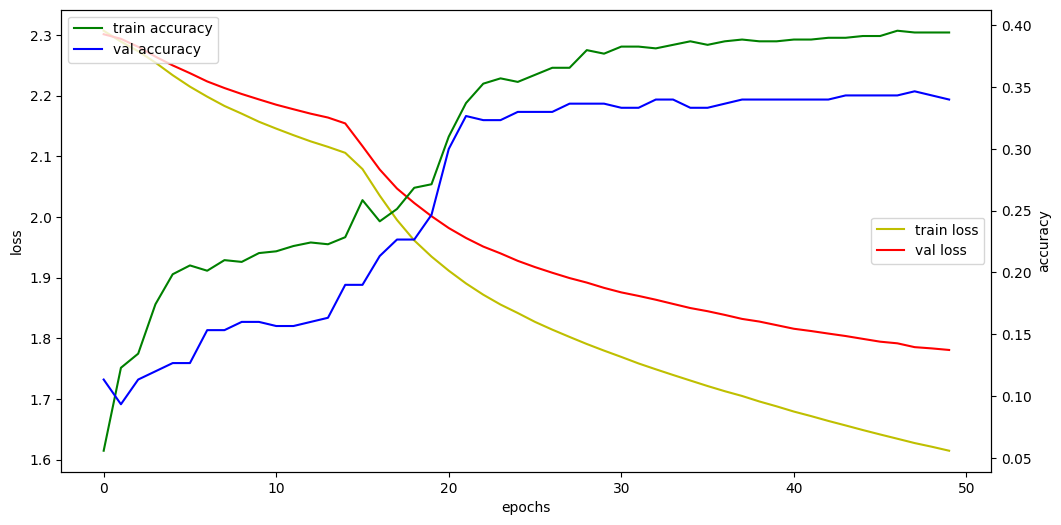

In [39]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# ※ 콜백함수 2: EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기종료
- Val_accuracy 값이 감소하면 지정한 epoch를 다 수행하지 않고 조기종료

In [40]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2) 
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 25ms/step - loss: 2.2998 - accuracy: 0.0814 - val_loss: 2.2847 - val_accuracy: 0.0600
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2747 - accuracy: 0.0800 - val_loss: 2.2677 - val_accuracy: 0.0567
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2524 - accuracy: 0.0986 - val_loss: 2.2431 - val_accuracy: 0.1167
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2247 - accuracy: 0.1257 - val_loss: 2.2178 - val_accuracy: 0.1367
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1957 - accuracy: 0.1486 - val_loss: 2.1923 - val_accuracy: 0.1267
Epoch 6/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1669 - accuracy: 0.1414 - val_loss: 2.1687 - val_accuracy: 0.1433
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1405 - accuracy: 0.1900 - val_loss: 2.1447 - val_accuracy: 0.1833
Epoch 8/500
7/7 [=========

In [41]:
#모델 자동 저장 콜백 
import os 
model_save_folder 

# ※ 콜백함수 3: ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy,loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [42]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10) 
# 모델 자동 저장 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'

checkpoint = ModelCheckpoint(filepath=file, 
                            monitor='val_accuracy', # 모리터할 지표
                            save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max', # 값이 클수록 저장
                            verbose=1 # 저장시 로그 출력
                            )

hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

Epoch 1/500
1/7 [===>..........................] - ETA: 2s - loss: 2.3549 - accuracy: 0.1400
Epoch 1: val_accuracy improved from -inf to 0.08667, saving model to ./model08\mnist-001-val0.0867.h5
7/7 [==============================] - 1s 28ms/step - loss: 2.3450 - accuracy: 0.1057 - val_loss: 2.3177 - val_accuracy: 0.0867
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2878 - accuracy: 0.0600
Epoch 2: val_accuracy improved from 0.08667 to 0.15333, saving model to ./model08\mnist-002-val0.1533.h5
7/7 [==============================] - 0s 9ms/step - loss: 2.2994 - accuracy: 0.1057 - val_loss: 2.2803 - val_accuracy: 0.1533
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2703 - accuracy: 0.1200
Epoch 3: val_accuracy improved from 0.15333 to 0.17333, saving model to ./model08\mnist-003-val0.1733.h5
7/7 [==============================] - 0s 9ms/step - loss: 2.2646 - accuracy: 0.1600 - val_loss: 2.2474 - val_accuracy: 0.1733
Epoch 4/500
1/7 [===>......

Epoch 28/500
1/7 [===>..........................] - ETA: 0s - loss: 1.8836 - accuracy: 0.3400
Epoch 28: val_accuracy did not improve from 0.36333
7/7 [==============================] - 0s 8ms/step - loss: 1.8047 - accuracy: 0.3771 - val_loss: 1.9024 - val_accuracy: 0.3633
Epoch 29/500
1/7 [===>..........................] - ETA: 0s - loss: 1.8408 - accuracy: 0.3000
Epoch 29: val_accuracy improved from 0.36333 to 0.36667, saving model to ./model08\mnist-029-val0.3667.h5
7/7 [==============================] - 0s 11ms/step - loss: 1.7940 - accuracy: 0.3814 - val_loss: 1.8946 - val_accuracy: 0.3667
Epoch 30/500
1/7 [===>..........................] - ETA: 0s - loss: 1.8469 - accuracy: 0.3100
Epoch 30: val_accuracy did not improve from 0.36667
7/7 [==============================] - 0s 8ms/step - loss: 1.7836 - accuracy: 0.3814 - val_loss: 1.8875 - val_accuracy: 0.3667
Epoch 31/500
1/7 [===>..........................] - ETA: 0s - loss: 1.7407 - accuracy: 0.3900
Epoch 31: val_accuracy improved 

In [43]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 2ms/step - loss: 1.8145 - accuracy: 0.3600


[1.8144992589950562, 0.36000001430511475]